##### Corrosion rate with max load

In [1]:
function max_load(K_i,b,h,a,g)
    h_eff = h^(3/2)
    sqrt_a = sqrt(a)
    ## max load
    P = (K_i * b * h_eff) / (sqrt_a * g)
    return P
end

max_load (generic function with 1 method)

In [2]:
# Constants
K_i = 40e6       # Critical stress intensity factor in Pa * m^(1/2)
b = 0.04        # Width of the beam in meters 
h = 0.012        # Height of the beam in meters 
t = 30           # Time in minutes
a_0 = 0.4*1e-3   # Initial crack length in m
g = 1.1          # Geometric factor for a three-point bending test

1.1

##### collect(...) converts this range into an array. 
##### crack width calculation

In [3]:
t = 30  # Time in minutes
a_0 = 0.4  # Initial crack width in mm
corrosion_rates = collect(0:0.01:0.1)  
a_values = Float64[]
# Calculate max load for each corrosion rate
for v in corrosion_rates
    # Calculate crack length `a` for each corrosion rate
    a = a_0 + v * t  # `a` in mm
     push!(a_values, a)
end
println(a_values)

[0.4, 0.7, 1.0, 1.2999999999999998, 1.6, 1.9, 2.1999999999999997, 2.5, 2.8, 3.0999999999999996, 3.4]


In [4]:
corrosion_rates = collect(0:0.01:0.1)  # Convert range to array explicitly
max_loads = Float64[]                     # Array to store maximum loads

# Calculate max load for each corrosion rate
for v in corrosion_rates
    # Calculate crack length `a` for each corrosion rate
    a = a_0 + v * t  # `a` in mm

    # Convert `a` to meters for consistency with other parameters
    a_meters = a * 1e-3
    
    # Calculate the maximum load for this value of `a`
    P = max_load(K_i, b, h, a_meters, g)
    
    # Store the maximum load in the array (convert to kN for readability)
    push!(max_loads, P / 1e3)  # Store in kN
end
println("Corrosion Rates: ", corrosion_rates)
println("Max Loads: ", max_loads)

Corrosion Rates: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
Max Loads: [95.60248276453807, 72.26868403294473, 60.46431910058625, 53.030715949108355, 47.80124138226903, 43.86542748654847, 40.76503562154883, 38.24099310581523, 36.13434201647237, 34.3414255828688, 32.79138106045873]


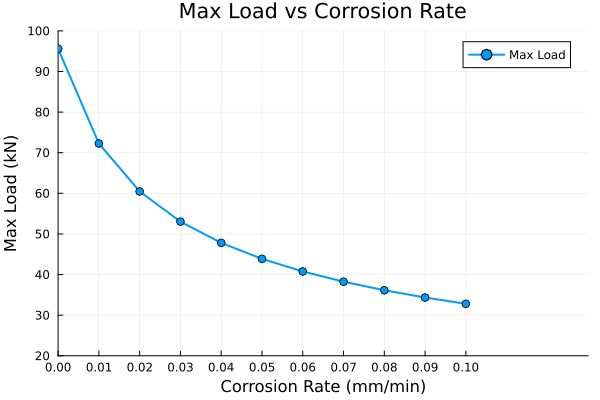

In [5]:
using Plots
plot(corrosion_rates,max_loads,xlabel="Corrosion Rate (mm/min)", ylabel="Max Load (kN)", xlims = (0,0.13), xticks = 0:0.01:0.1,
    ylims = (20,100), yticks = 0:10:100, title="Max Load vs Corrosion Rate", label="Max Load", lw=2,marker =:o)